In [259]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from math import log10
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

df = pd.read_csv('train.csv')
test = pd.read_csv('test_x.csv')
df.head(20)

,user_id,org_id,rating,ts,user_city,org_city,average_bill,rating_org,rubrics,food_delivery,...,call_button,wheelchair_accessible,table_games,vinotheque,cakes_for_different_occasions,accepted_credit_cards,kalyan,teahouse,bread_from_tandoor,handmade_goods
0,12182789761588196310,11946401375069641937,4.0,677,msk,msk,1500.0,3.883212,Ресторан,1,...,0,0,0,0,0,0,0,0,0,0
1,2796544982129273287,5545859981678495568,5.0,577,msk,msk,1000.0,4.495379,Ресторан,1,...,0,0,0,0,0,0,0,0,0,0
2,10546824832088319728,3451485117888180206,4.0,716,msk,msk,500.0,4.576063,Кафе,1,...,0,0,0,0,0,0,0,0,0,0
3,9967742981458207920,9490041040735762889,3.0,639,spb,spb,1000.0,3.775701,Кафе,1,...,0,0,0,0,0,0,0,0,0,0
4,11046819495825038093,5234254278902729372,5.0,669,msk,msk,500.0,4.187500,Пиццерия,1,...,0,1,0,0,0,0,0,0,0,0
5,14296765830420161051,1442344825802528328,3.0,1186,msk,msk,NaN,4.417529,Кафе,0,...,0,0,0,0,0,0,0,0,0,0
6,12923831187689997640,14124784519790591333,5.0,1191,msk,msk,500.0,4.790698,Кафе,1,...,0,0,0,0,0,1,0,1,0,0
7,10057920589481344279,6755669075968379218,5.0,458,msk,msk,1500.0,4.253944,Ресторан,1,...,0,0,0,0,0,0,0,0,0,0
8,9975191723608346225,8524317870173887334,4.0,475,msk,msk,500.0,4.051370,Быстрое питание,1,...,0,0,0,0,0,0,0,0,0,0
9,4034027593745622590,4403059393561217597,5.0,958,msk,msk,NaN,4.521127,"Бар, паб",1,...,0,0,0,0,0,0,0,0,0,0


In [242]:
df.describe()

,user_id,org_id,rating,ts,average_bill,rating_org,food_delivery,breakfast,takeaway,summer_terrace,...,call_button,wheelchair_accessible,table_games,vinotheque,cakes_for_different_occasions,accepted_credit_cards,kalyan,teahouse,bread_from_tandoor,handmade_goods
count,7.399500e+04,7.399500e+04,73995.000000,73995.000000,45433.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,...,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000,73995.000000
mean,9.196627e+18,9.038261e+18,4.322779,714.540766,1075.891973,4.319332,0.757119,0.576607,0.649206,0.602554,...,0.008014,0.007406,0.017677,0.002149,0.002419,0.001027,0.000932,0.001230,0.002960,0.001216
std,5.312861e+18,5.275833e+18,1.130370,293.492213,2733.507688,0.308584,0.428827,0.494100,0.477222,0.489373,...,0.089162,0.085739,0.131775,0.046306,0.049125,0.032032,0.030523,0.035047,0.054323,0.034854
min,1.445171e+14,1.626686e+15,1.000000,0.000000,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.614445e+18,4.504716e+18,4.000000,505.000000,500.000000,4.180952,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.191287e+18,9.104453e+18,5.000000,699.000000,500.000000,4.368304,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.376070e+19,1.350392e+19,5.000000,958.000000,1000.000000,4.524001,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.844666e+19,1.844531e+19,5.000000,1216.000000,246500.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/var/folders/5p/9lyjttd939bd1j1pzshxy5kc0000gn/T/ipykernel_28129/381532105.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['rating_org'].to_csv('corr.csv')
/var/folders/5p/9lyjttd939bd1j1pzshxy5kc0000gn/T/ipykernel_28129/381532105.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

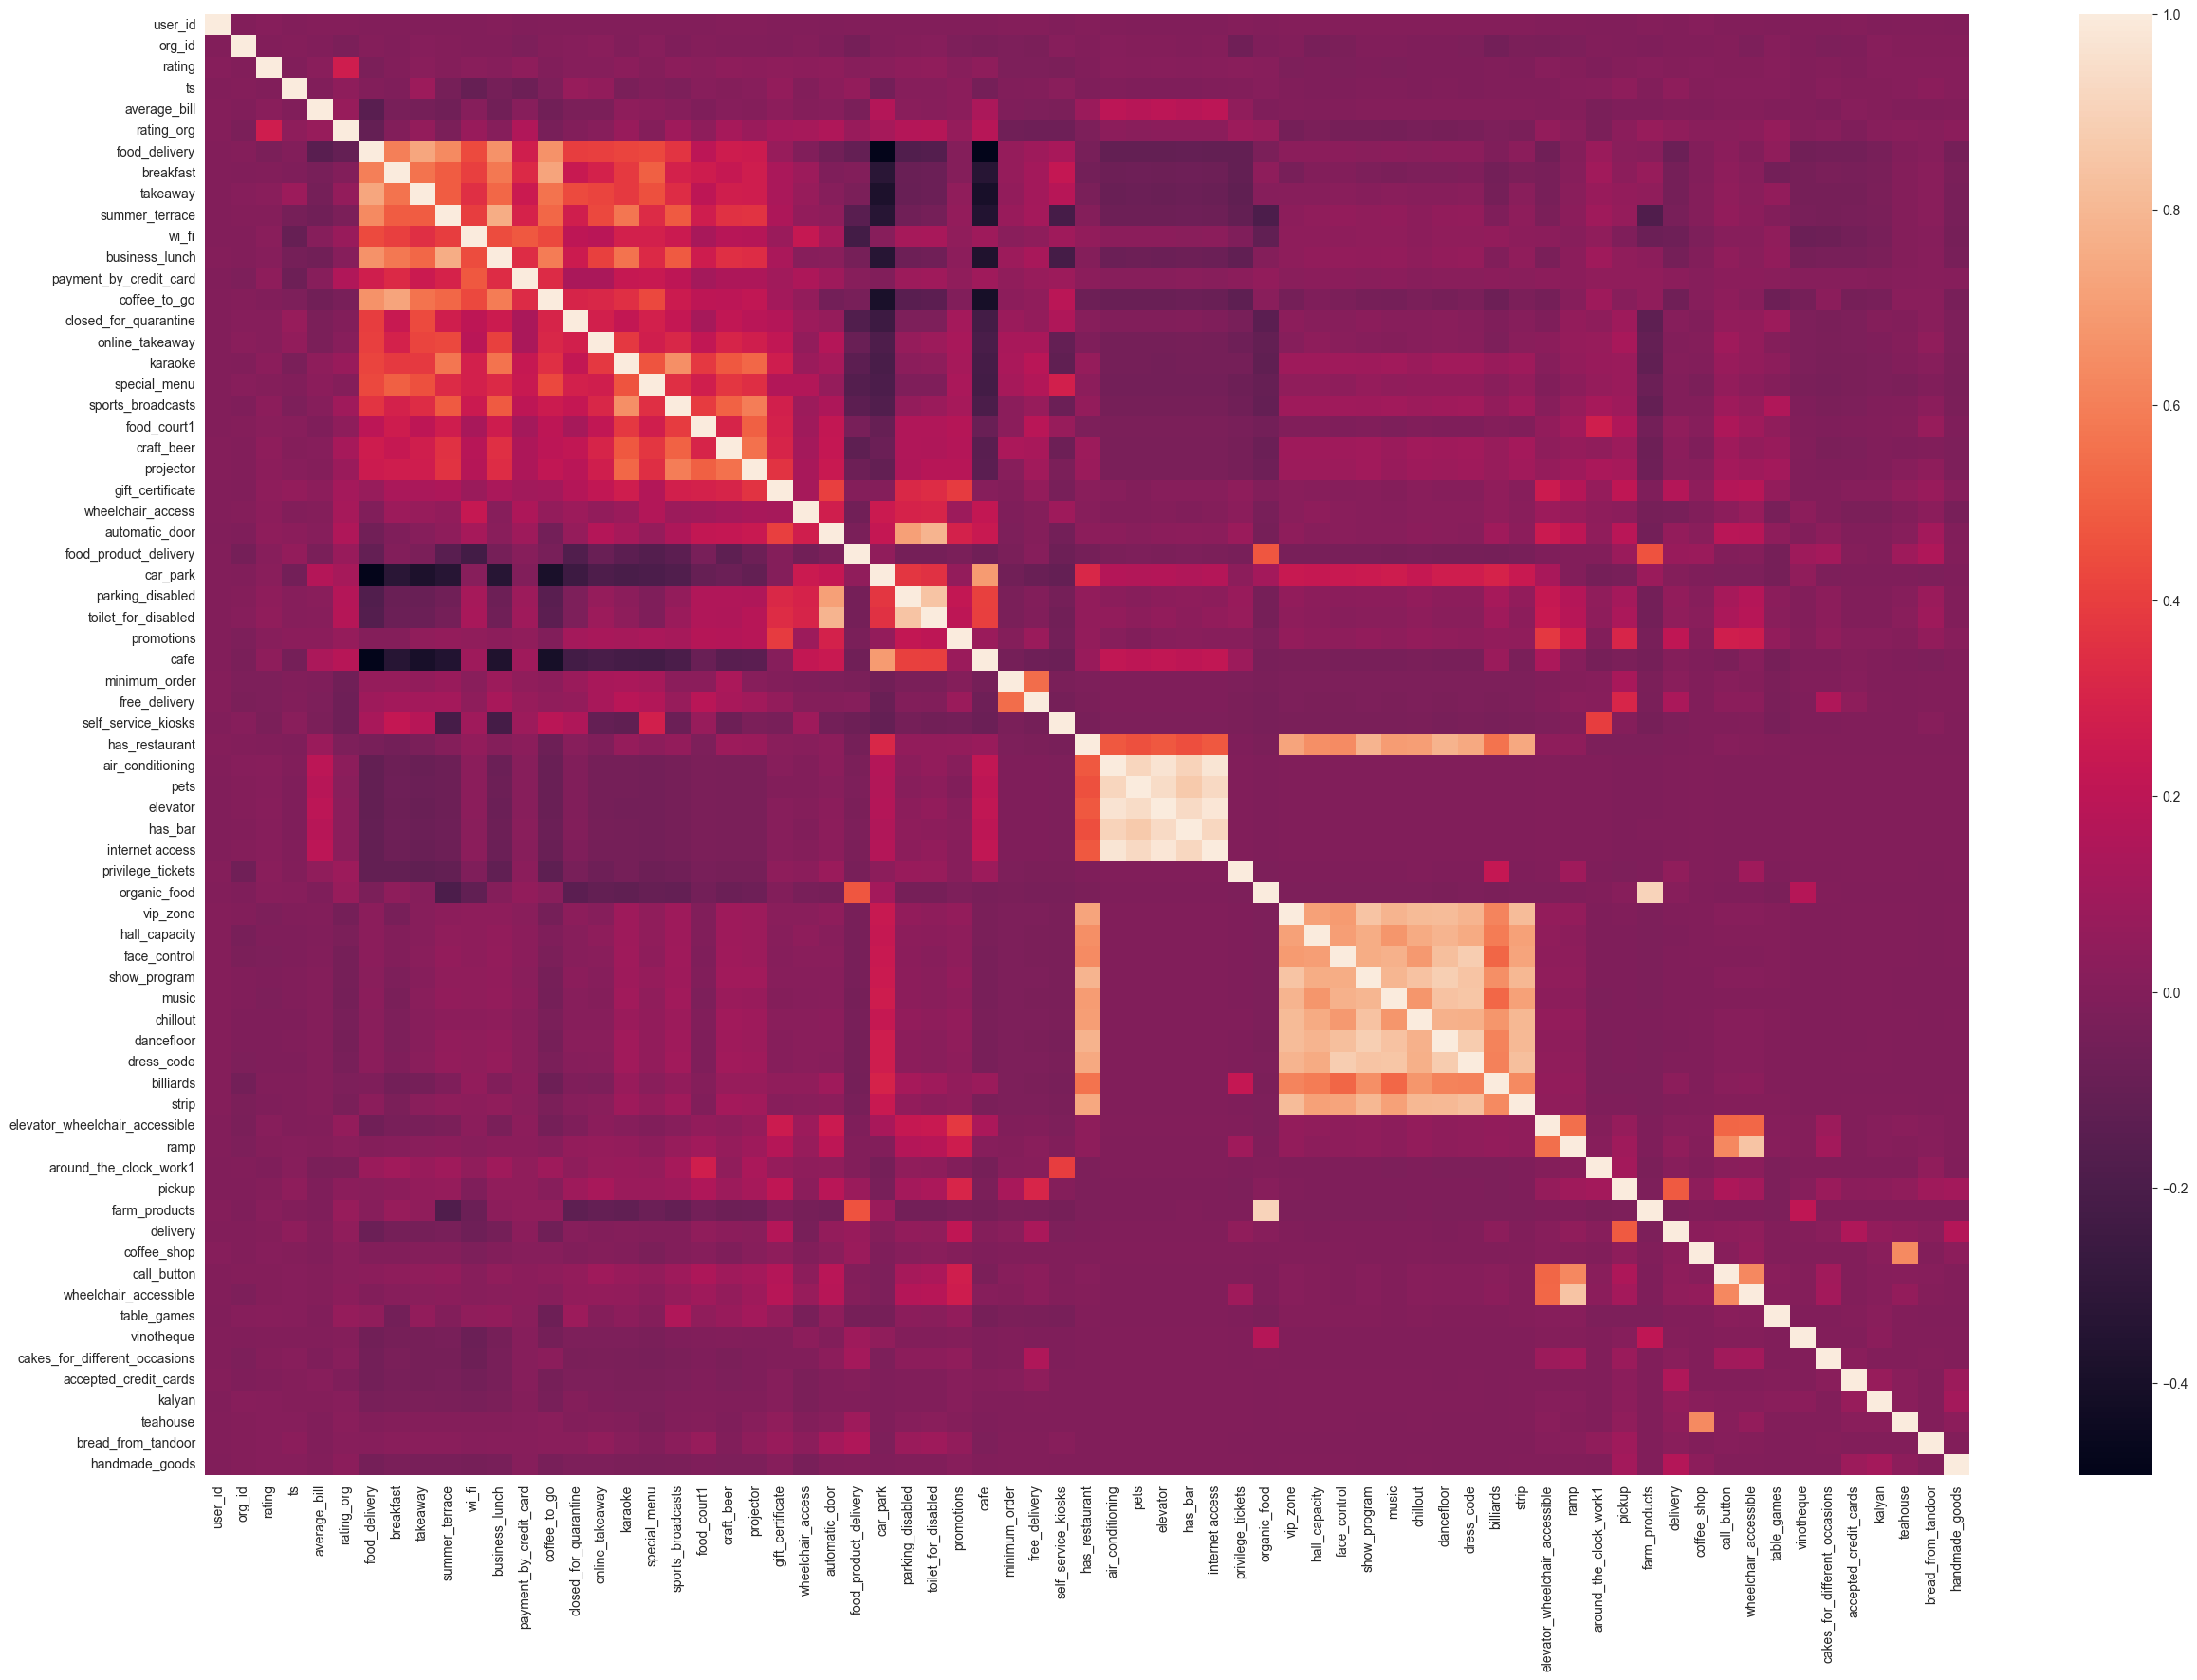

In [264]:
plt.subplots(figsize=(30, 20))
df.corr()['rating_org'].to_csv('corr.csv')
pd.get_dummies(df).corr()['rating_org'].to_csv('corr1.csv')
sns.heatmap(df.corr())

In [244]:
df.sum()

user_id                                                3995328851063806308
org_id                                                 -557345393352723166
rating                                                            319864.0
ts                                                                52872444
user_city                mskmskmskspbmskmskmskmskmskmskmskspbmskmskmskm...
                                               ...                        
accepted_credit_cards                                                   76
kalyan                                                                  69
teahouse                                                                91
bread_from_tandoor                                                     219
handmade_goods                                                          90
Length: 72, dtype: object

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73995 entries, 0 to 73994
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         73995 non-null  uint64 
 1   org_id                          73995 non-null  uint64 
 2   rating                          73995 non-null  float64
 3   ts                              73995 non-null  int64  
 4   user_city                       73995 non-null  object 
 5   org_city                        73995 non-null  object 
 6   average_bill                    45433 non-null  float64
 7   rating_org                      73995 non-null  float64
 8   rubrics                         73995 non-null  object 
 9   food_delivery                   73995 non-null  int64  
 10  breakfast                       73995 non-null  int64  
 11  takeaway                        73995 non-null  int64  
 12  summer_terrace                  

In [246]:
test.head()
print(df.columns)

Index(['user_id', 'org_id', 'rating', 'ts', 'user_city', 'org_city',
       'average_bill', 'rating_org', 'rubrics', 'food_delivery', 'breakfast',
       'takeaway', 'summer_terrace', 'wi_fi', 'business_lunch',
       'payment_by_credit_card', 'coffee_to_go', 'closed_for_quarantine',
       'online_takeaway', 'karaoke', 'special_menu', 'sports_broadcasts',
       'food_court1', 'craft_beer', 'projector', 'gift_certificate',
       'wheelchair_access', 'automatic_door', 'food_product_delivery',
       'car_park', 'parking_disabled', 'toilet_for_disabled', 'promotions',
       'cafe', 'minimum_order', 'free_delivery', 'self_service_kiosks',
       'has_restaurant', 'air_conditioning', 'pets', 'elevator', 'has_bar',
       'internet access', 'privilege_tickets', 'organic_food', 'vip_zone',
       'hall_capacity', 'face_control', 'show_program', 'music', 'chillout',
       'dancefloor', 'dress_code', 'billiards', 'strip',
       'elevator_wheelchair_accessible', 'ramp', 'around_the_clock_w

In [247]:
#df['ts'].hist(bins=50, figsize=(15, 6))
drop_columns = ['food_delivery', 'breakfast',
       'takeaway', 'summer_terrace', 'wi_fi', 'business_lunch',
       'payment_by_credit_card', 'coffee_to_go', 'closed_for_quarantine',
       'online_takeaway', 'karaoke', 'special_menu', 'sports_broadcasts',
       'food_court1', 'craft_beer', 'projector', 'gift_certificate',
       'wheelchair_access', 'automatic_door', 'food_product_delivery',
       'car_park', 'parking_disabled', 'toilet_for_disabled', 'promotions',
       'cafe', 'minimum_order', 'free_delivery', 'self_service_kiosks',
       'has_restaurant', 'air_conditioning', 'pets', 'elevator', 'has_bar',
       'internet access', 'privilege_tickets', 'organic_food', 'vip_zone',
       'hall_capacity', 'face_control', 'show_program', 'music', 'chillout',
       'dancefloor', 'dress_code', 'billiards', 'strip',
       'elevator_wheelchair_accessible', 'ramp', 'around_the_clock_work1',
       'pickup', 'farm_products', 'delivery', 'coffee_shop', 'call_button',
       'wheelchair_accessible', 'table_games', 'vinotheque',
       'cakes_for_different_occasions', 'accepted_credit_cards', 'kalyan',
       'teahouse', 'bread_from_tandoor', 'handmade_goods']

must_have_adds = ['takeaway', 'payment_by_credit_card', 'air_conditioning',
                  'farm_products', 'organic_food', 'free_delivery', 'self_service_kiosks',
                  'promotions', 'car_park', 'internet access', 'around_the_clock_work1',
                  'bread_from_tandoor', 'accepted_credit_cards', 'business_lunch',
                  'wi_fi', 'summer_terrace', ]

cool_adds = ['food_delivery', 'breakfast', 'coffee_to_go',
       'online_takeaway',  'special_menu',
       'food_court1', 'craft_beer', 'projector', 'gift_certificate',
       'wheelchair_access', 'automatic_door', 'food_product_delivery',
       'toilet_for_disabled','cafe', 'parking_disabled',
       'has_restaurant', 'elevator', 'has_bar', 'vip_zone',
       'hall_capacity',  'music', 'chillout',
       'elevator_wheelchair_accessible', 'ramp',
       'pickup',  'delivery', 'coffee_shop', 'call_button',
       'wheelchair_accessible', 'table_games', 'vinotheque',
       'cakes_for_different_occasions', 'handmade_goods']

not_cool_adds = ['kalyan', 'dress_code', 'dancefloor', 'pets', 'billiards',
                 'teahouse', 'strip', 'show_program', 'privilege_tickets',
                 'karaoke', 'minimum_order', 'sports_broadcasts', 'face_control',]
print(len(must_have_adds))
print(len(cool_adds))
print(len(not_cool_adds))


16
33
13


<AxesSubplot: >

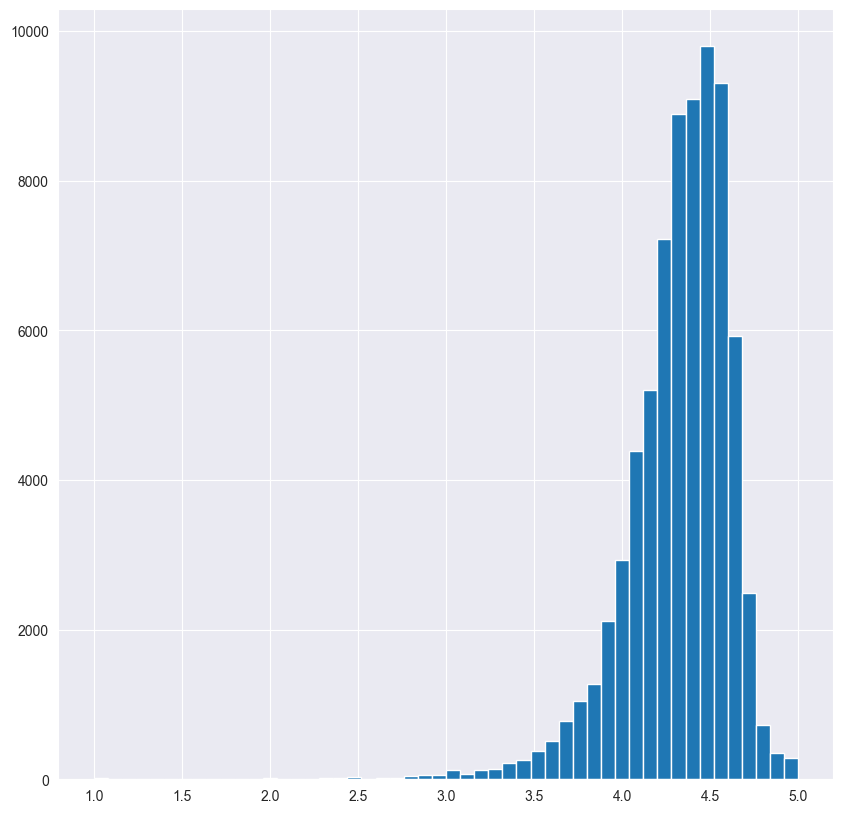

In [248]:
df['rating_org'].hist(bins = 50)

In [249]:
def save_log10(x):
    if x <= 0:
        return 0
    return log10(x)

min_elem = 4

def sub(x):
    return 3 * (x - min_elem)

def unite_categories(categories, df1, name):
    df1[name] = df1[categories].sum(axis=1)
    df1 = df1.drop(categories, axis=1)
    return df1

def unique_categories(categories, df1):
    for category in categories:
        df1['unique' + category] = df1[category] * df1[category].sum() / df1.shape[0]
    return df1

def predProcess(df1):
    df1['average_bill'] = df1['average_bill'].fillna(df1['average_bill'].mean())
    #proc rubrics
    uniqueRub = df1['rubrics'].unique()
    counts = np.zeros(uniqueRub.size)
    for i in range (uniqueRub.size):
        rubric = uniqueRub[i]
        counts[i] = df1.loc[df1['rubrics'] == rubric]['org_id'].unique().shape[0]
    rubrics = pd.DataFrame({'name' : uniqueRub, 'count' : counts})
    rubrics['sumScore'] = np.zeros(uniqueRub.size)
    rubrics['feedbacks'] = np.zeros(uniqueRub.size)
    rubrics['averageScore'] = np.zeros(uniqueRub.size)
    rubrics.head()
    rubrics = rubrics.groupby(['name']).mean()
    for i, next in df1.iterrows():
        nextB = next['rubrics']
        nextScore = next['rating']
        rubrics['sumScore'][nextB] += nextScore
        rubrics['feedbacks'][nextB] += 1
    for i in range(rubrics.shape[0]):
        rubrics['averageScore'] = rubrics['sumScore'] / rubrics['feedbacks']
    df1['prestige'] = np.zeros(df1.shape[0])
    for i, next in df1.iterrows():
        df1['prestige'][i] = rubrics['averageScore'][next['rubrics']]
    df1 = df1.drop(['rubrics'], axis=1)

    #proc bool categories
    have_columns = drop_columns.copy()
    #for column in drop_columns:
    #    if abs(corr[column]) < 0.1:
     #       df1 = df1.drop(column, axis=1)
     #       have_columns.remove(column)
    #unite_categories(have_columns, df1, 'additions')

    #proc bool for unique
    #df1 = unique_categories(drop_columns, df1)
    #proc all
    df1 = df1.assign(
        rating_1 = (df1.rating == 1.0).astype(int),
        rating_2 = (df1.rating == 2.0).astype(int),
        rating_3 = (df1.rating == 3.0).astype(int),
        rating_4 = (df1.rating == 4.0).astype(int),
        rating_5 = (df1.rating == 5.0).astype(int),
        ts_0_500 = (df1.ts <= 500).astype(int),
        ts_500_1000 = ((df1.ts > 500) & (df1.ts <= 1000)).astype(int),
        ts_1000_ = (df1.ts > 1000).astype(int),
        avg_bill_0_500 = (df1.average_bill <= 500).astype(int),
        avg_bill_500_1000 = ((df1.average_bill > 500) & (df1.average_bill <= 1000)).astype(int),
        avg_bill_1000_1500_= ((df1.average_bill > 1000) & (df1.average_bill <= 1500)).astype(int),
        avg_bill_1500_ = (df1.average_bill > 1500).astype(int),
        #ts = df1.ts.apply(save_log10)
        #average_bill=df1.average_bill.apply(save_log10)
        )

    df1 = unite_categories(must_have_adds, df1, 'must_have')
    df1 = unite_categories(cool_adds, df1, 'cool')
    df1 = unite_categories(not_cool_adds, df1, 'not_cool')

    df1 = df1.drop(['user_id', 'org_id', 'ts', 'average_bill', 'rating_org', 'rating',
         'closed_for_quarantine'], axis=1)
    df1 = pd.get_dummies(df1)
    return df1

#train_y = df['rating_org']
#train_x = predProcess(df)
#test['rating_org'] = np.zeros(test.shape[0])
#test_x = predProcess(test)


train, test = train_test_split(df, test_size=0.3)
train_y = train['rating_org']
train_x = predProcess(train)
test_y = test['rating_org']
test_x = predProcess(test)
train_x.head()

/var/folders/5p/9lyjttd939bd1j1pzshxy5kc0000gn/T/ipykernel_28129/3823878437.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['prestige'][i] = rubrics['averageScore'][next['rubrics']]
/var/folders/5p/9lyjttd939bd1j1pzshxy5kc0000gn/T/ipykernel_28129/3823878437.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['prestige'][i] = rubrics['averageScore'][next['rubrics']]


,prestige,rating_1,rating_2,rating_3,rating_4,rating_5,ts_0_500,ts_500_1000,ts_1000_,avg_bill_0_500,avg_bill_500_1000,avg_bill_1000_1500_,avg_bill_1500_,must_have,cool,not_cool,user_city_msk,user_city_spb,org_city_msk,org_city_spb
61787,4.313837,0,0,0,0,1,0,0,1,0,0,1,0,6,7,2,1,0,1,0
39220,4.312063,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0
13014,4.147291,0,0,0,0,1,0,0,1,0,0,1,0,4,5,0,1,0,1,0
62501,4.363382,0,0,0,0,1,0,1,0,1,0,0,0,6,6,1,1,0,1,0
10836,4.363382,0,1,0,0,0,1,0,0,1,0,0,0,5,8,2,1,0,1,0


In [250]:
train_x.head()

,prestige,rating_1,rating_2,rating_3,rating_4,rating_5,ts_0_500,ts_500_1000,ts_1000_,avg_bill_0_500,avg_bill_500_1000,avg_bill_1000_1500_,avg_bill_1500_,must_have,cool,not_cool,user_city_msk,user_city_spb,org_city_msk,org_city_spb
61787,4.313837,0,0,0,0,1,0,0,1,0,0,1,0,6,7,2,1,0,1,0
39220,4.312063,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0
13014,4.147291,0,0,0,0,1,0,0,1,0,0,1,0,4,5,0,1,0,1,0
62501,4.363382,0,0,0,0,1,0,1,0,1,0,0,0,6,6,1,1,0,1,0
10836,4.363382,0,1,0,0,0,1,0,0,1,0,0,0,5,8,2,1,0,1,0


In [251]:
df[must_have_adds].sum(axis=1)

0        3
1        5
2        5
3        5
4        7
        ..
73990    4
73991    2
73992    5
73993    0
73994    1
Length: 73995, dtype: int64

In [258]:
min_er = 1
best_k = 10
for i in range(10, 300, 20):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(train_x, train_y)
    pred = model.predict(test_x)
    er = mean_absolute_percentage_error(2**test_y, 2**pred)
    if er < min_er:
        min_er = er
        best_k = i

model = KNeighborsRegressor(n_neighbors=best_k)
model.fit(train_x, train_y)
pred = model.predict(test_x)
print(mean_absolute_percentage_error(2**test_y, 2**pred))
res = pd.DataFrame({'id' : np.arange(pred.shape[0]), 'rating_org' : pred})
res = res.groupby(['id']).mean()
res.to_csv('out.csv')


0.1330258488685549
10


(array([2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.300e+01, 1.000e+01, 1.000e+00, 1.300e+01, 3.600e+01, 4.800e+01,
        3.600e+01, 7.700e+01, 1.190e+02, 1.170e+02, 1.480e+02, 1.690e+02,
        1.900e+02, 2.630e+02, 3.360e+02, 4.430e+02, 4.720e+02, 6.100e+02,
        6.700e+02, 7.320e+02, 8.130e+02, 1.091e+03, 1.151e+03, 1.201e+03,
        1.254e+03, 1.352e+03, 1.492e+03, 1.506e+03, 1.756e+03, 1.411e+03,
        1.236e+03, 7.490e+02, 6.650e+02, 4.860e+02, 3.830e+02, 2.240e+02,
        2.780e+02, 1.970e+02, 1.100e+02, 1.430e+02, 6.000e+00, 3.800e+01,
        4.000e+00, 1.470e+02]),
 array([3.84175735, 3.85768384, 3.87361033, 3.88953682, 3.90546331,
        3.9213898 , 3.93731629, 3.95324278, 3.96916927, 3.98509576,
        4.00102225, 4.01694875, 4.03287524, 4.04880173, 4.06472822,
        4.08065471, 4.0965812 , 4.11250769, 4.12843418, 4.14436067,
        4.16028716, 4.17621365, 4.19214014, 4.20806663, 4.22399312,
        4.23991961, 4.2558461 , 4.27

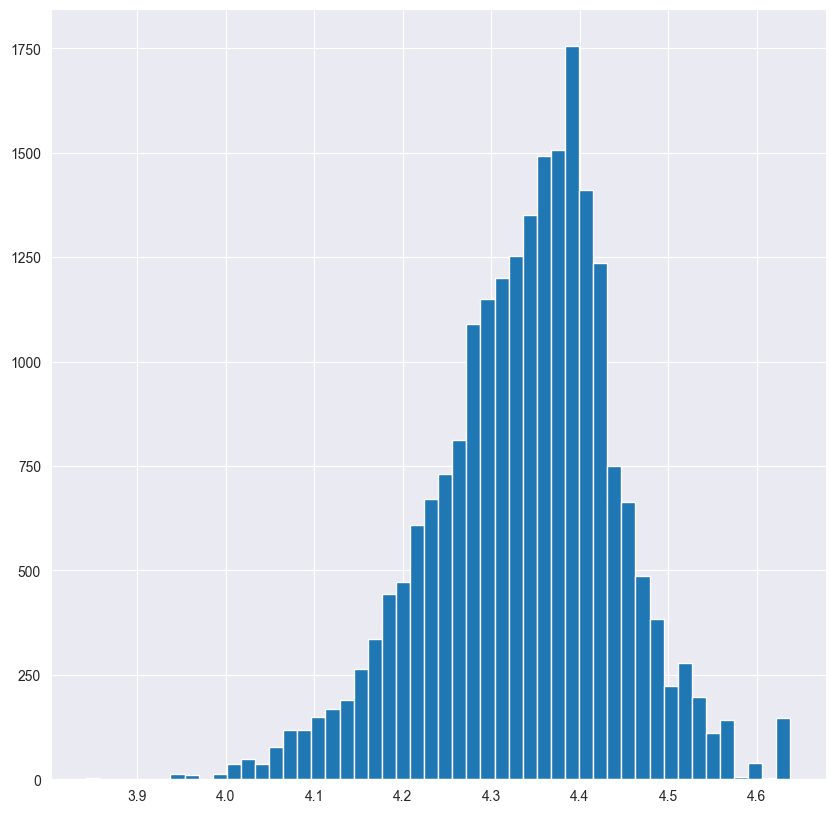

In [253]:
plt.hist(pred, bins=50)

In [254]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели

In [255]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1)
# Обучаем модель на тестовом наборе данных
model.fit(train_x, train_y)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(test_x)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


<AxesSubplot: >

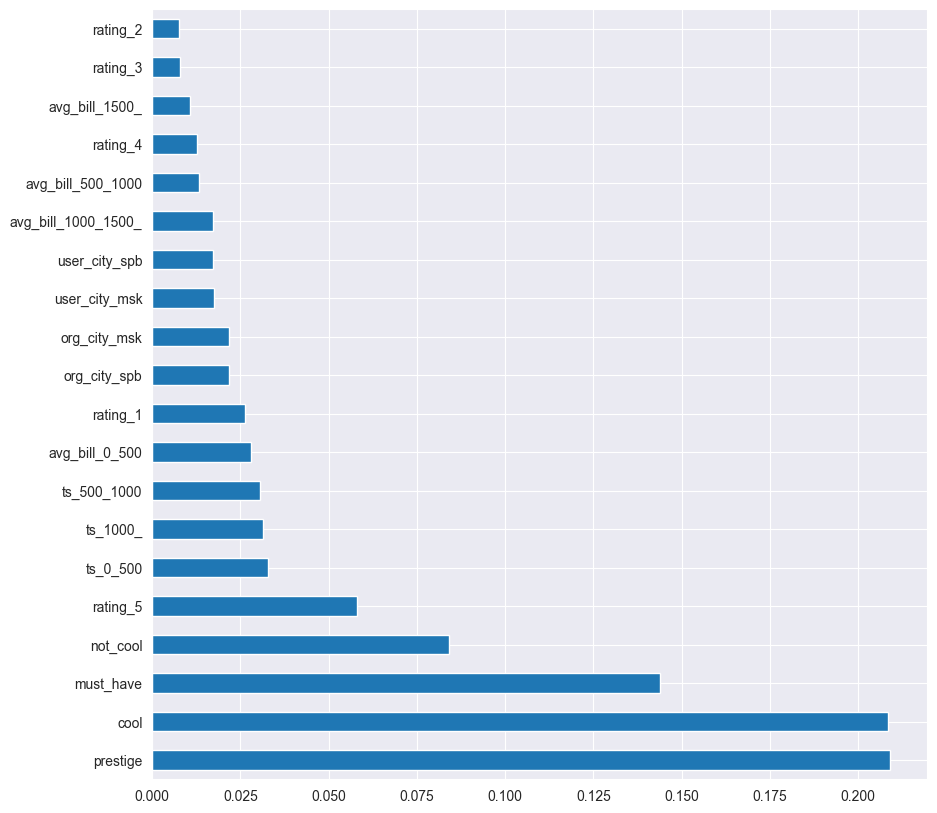

In [256]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=train_x.columns)
feat_importances.nlargest(30).plot(kind='barh')